<a href="https://colab.research.google.com/github/Saugat2002/PRODIGY_ML/blob/master/PRODIGY_ML_03/SVM_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


### Importing the Data

In [2]:
# Importing Basic Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing the extra required libraries
import os
import random
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import image
from skimage.io import imread, imshow
from skimage.transform import resize

In [4]:
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/PRODIGY_ML/PRODIGY_ML_03/train'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/PRODIGY_ML/PRODIGY_ML_03/test'

Due to lack of resources and computing power, I am only using 2000 images randomly selected from the data. SO, the accuracy of the model will also be in proportion to the amount of data.

In [6]:
# Assisgning the labels for each image
image_paths = []
labels = []
for label, class_name in enumerate(['cat', 'dog']):
    class_dir = os.path.join(train_data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_paths.append(os.path.join(class_dir, filename))
            labels.append(label)

In [7]:
# Loading all images as a list of array
images = []
for image_path in image_paths:
    img = imread(image_path)
    img = resize(img, (100, 100))  # Resize image to a consistent size
    img = img.flatten()  # Flatten the image into a 1D array
    images.append(img)

The shape of each image is (30000,) which means it is converted to a 1D array of 30000 pixel values

In [8]:
X = np.array(images)
y = np.array(labels)

images are stored in X and its respective labels are stored in y.

### Visualizing some data

In [10]:
def visualize(image, label):
  plt.imshow(image)
  plt.show()
  animal = "Cat" if (label == 0) else "Dog"
  print("\nThis is a", animal , "\n")

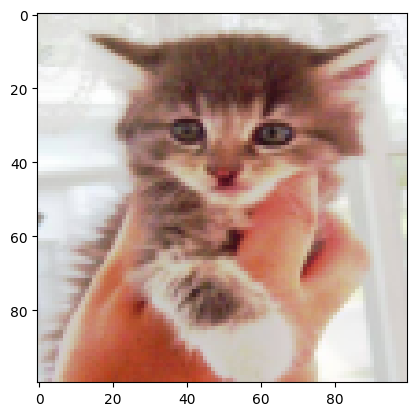


This is a Cat 



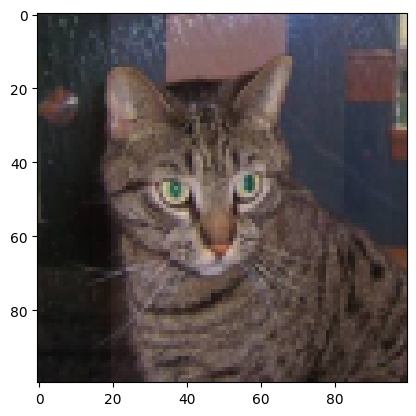


This is a Cat 



In [22]:
for i in range(2):
  visualize(images[i].reshape(100,100,3), labels[i])

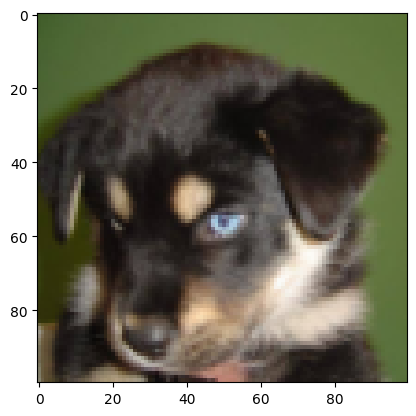


This is a Dog 



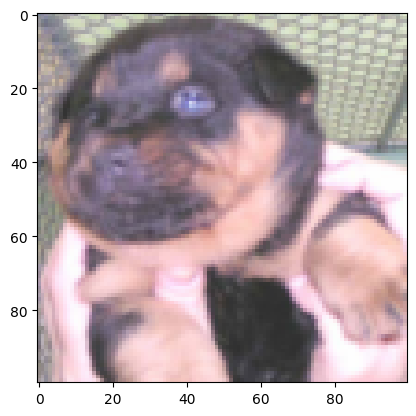


This is a Dog 



In [28]:
for i in range(1,3):
  visualize(images[-i].reshape(100,100,3), labels[-i])

### Model training

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True , random_state=42)

In [13]:
clf = svm.SVC(C=10,kernel='poly',degree=3,gamma=0.001,probability=True)


In [14]:
clf.fit(X_train, y_train)


SVC(C=10, gamma=0.001, kernel='poly', probability=True)

In [15]:
y_pred = clf.predict(X_test)


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6175


Since we only used a small portion of data the accuracy is 61.75%

### Predicting using Test Data

In [17]:
categories = ['cat', 'dog']

In [18]:
def predict(j):
  test_1 = f"{test_data_dir}/{j}.jpg"
  img = imread(test_1)
  plt.imshow(img)
  plt.show()
  img = resize(img, (100, 100))
  img = [img.flatten()]
  probability = clf.predict_proba(img)
  for i,category in enumerate(categories):
	    print(f'{category} = {probability[0][i]*100}%')
  print("The predicted image is : ", categories[clf.predict(img)[0]])

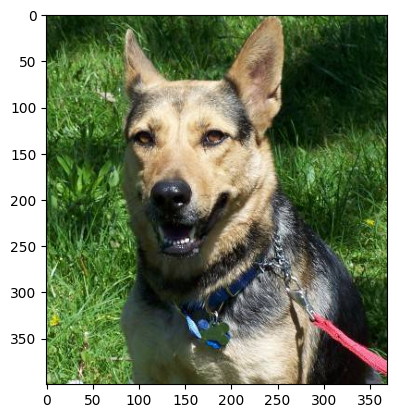

cat = 39.31491470981216%
dog = 60.685085290187835%
The predicted image is :  dog


In [19]:
predict(42)

It is predicted as dog with 60.68% probability

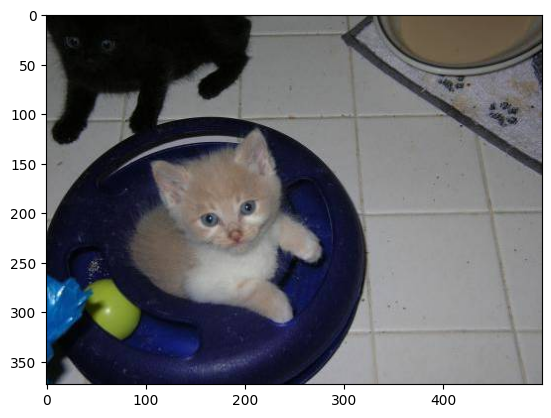

cat = 56.55164615529499%
dog = 43.44835384470503%
The predicted image is :  cat


In [21]:
predict(914)

It is predicted as cat with 56.5% probability

### End of the Code